In [2]:

# https://stats.stackexchange.com/questions/59774/test-whether-variables-follow-the-same-distribution#59875
test.statistic <- function(x, y) {
  transform <- function(z) -log(1-z^2)/2
  fit <- qqplot(x,y, plot.it=FALSE)
  transform(cor(fit$x, fit$y))
}

In [3]:

permutation.test <- function(n.iter, x, y) {
  z <- c(x,y)
  n.x <- length(x)
  n.y <- length(y)
  n <- length(z)
  k <- min(n.x, n.y)
  divide <- function() {
    i <- sample.int(n, size=k)
    test.statistic(z[i], z[-i])
  }
  replicate(n.iter, divide())
}

In [4]:

f <- function(n.x, n.y, n.iter, test=test.statistic, dist.x=runif, dist.y=runif,
              plot.it=FALSE) {
  x <- dist.x(n.x)
  y <- dist.y(n.y)
  if(plot.it) {qqplot(x, y)}

  t0 <- test(x, y)
  sim <- permutation.test(n.iter, x, y)
  p <- mean(sim > t0) + mean(sim==t0)/2
  if(plot.it) {
    hist(sim, xlim=c(min(t0, min(sim)), max(t0, max(sim))), 
         main="Permutation distribution")
    abline(v=t0, col="Red", lwd=2)
  }
  return(p)
}

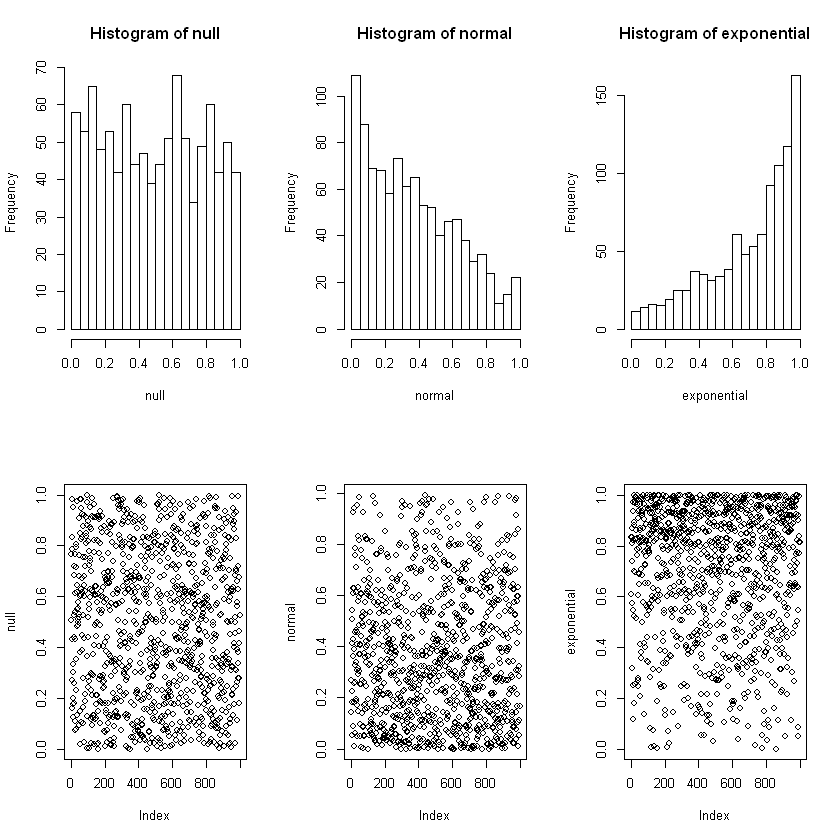

In [5]:

set.seed(17)             # Makes the results reproducible
n.per.rep <- 1000        # Number of iterations to compute each p-value
n.reps <- 1000           # Number of times to call `f`
n.x <- 16; n.y <- 16     # Dataset sizes

par(mfcol=c(2,3))        # Lay results out in three columns
null <- replicate(n.reps, f(n.x, n.y, n.per.rep))
hist(null, breaks=20)
plot(null)

normal <- replicate(n.reps, f(n.x, n.y, n.per.rep, dist.y=rnorm))
hist(normal, breaks=20)
plot(normal)

exponential <- replicate(n.reps, f(n.x, n.y, n.per.rep, dist.y=function(n) {rgamma(n, 1)}))
hist(exponential, breaks=20)
plot(exponential)

In [27]:

# The null hypothesis that the samples are drawn from the same distribution
test.statistic <- function(x, y) {
  ks.test(x,y)$statistic
}

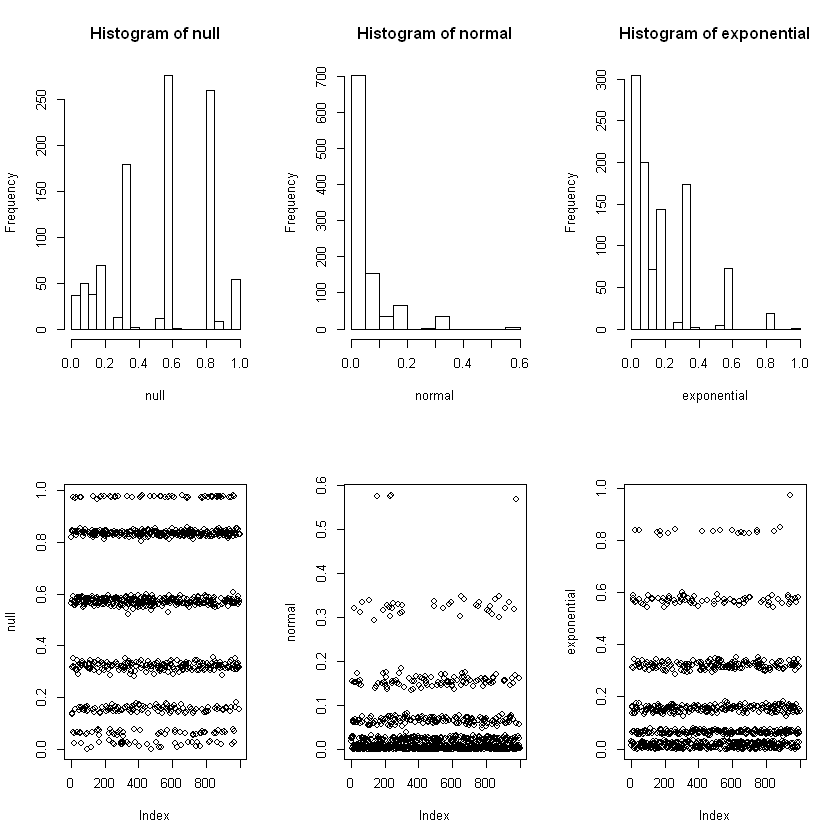

In [7]:

set.seed(17)             # Makes the results reproducible
n.per.rep <- 1000        # Number of iterations to compute each p-value
n.reps <- 1000           # Number of times to call `f`
n.x <- 16; n.y <- 16     # Dataset sizes

par(mfcol=c(2,3))        # Lay results out in three columns
null <- replicate(n.reps, f(n.x, n.y, n.per.rep))
hist(null, breaks=20)
plot(null)

normal <- replicate(n.reps, f(n.x, n.y, n.per.rep, dist.y=rnorm))
hist(normal, breaks=20)
plot(normal)

exponential <- replicate(n.reps, f(n.x, n.y, n.per.rep, dist.y=function(n) {rgamma(n, 1)}))
hist(exponential, breaks=20)
plot(exponential)

In [ ]:

null

In [ ]:

alist = c(6.02, 7.7, 6.48, 8.04, 7.56, 5.0, 7.69, 1.73, 1.82, 5.93, 3.4, 1.82, 2.52, 12.74, 4.31, 13.9, 11.0, 6.95, 5.3, 6.67, 4.85, 1.4,
          19.76, 9.04, 9.32, 13.55, 2.31, 8.04, 3.36, 15.04, 9.5, 41.25, 17.14, 35.9, 1.1, 1.3, 11.49, 11.63, 9.13, 2.1, 8.82, 1.1, 3.23,
          10.9, 9.94, 4.44, 9.85, 0.0, 7.38, 1.71, 9.0)
hist(alist, breaks=20)
plot(alist)

In [ ]:

blist = c(12.08, 40.11, 11.83, 20.28, 12.48, 23.21, 8.38, 17.99, 22.74, 12.46, 9.64, 7.11, 7.12, 19.53, 19.19, 28.61, 15.26, 16.43,
          61.56, 9.32, 7.35, 17.6, 14.43, 8.77, 25.46, 15.93, 17.87, 11.62, 7.49, 36.56, 8.31, 10.87, 34.64, 14.44, 32.83, 8.46,
          14.01, 13.14, 16.06, 7.41, 20.61, 13.9, 6.26, 14.51, 11.61, 11.13, 27.83, 33.45, 31.37)
hist(blist, breaks=20)
plot(blist)

In [11]:

clist = c(3.58, 1.5, 0.6, 2.5, 0.8, 3.19, 1.5, 9.2, 1.5, 6.2, 0.0, 1.2, 2.2, 1.2, 0.9, 0.9, 0.0, 4.2, 4.5, 0.5, 1.1, 1.2, 1.3, 1.1,
          1.2, 2.3, 0.0, 1.2, 1.1, 3.01, 0.7, 0.0, 0.67, 1.6, 0.94, 2.4, 0.7, 0.0, 1.1, 0.9, 0.7, 1.5, 0.66, 1.7, 1.3, 1.0, 0.0, 0.3,
          0.0, 0.8, 0.5)

In [12]:

dlist = c(3.07, 6.82, 3.73, 2.64, 3.36, 2.65, 1.26, 1.56, 0.38, 2.77, 1.79, 1.68, 1.62, 0.53, 1.32, 1.77, 2.23, 2.99, 2.96, 1.43,
          1.73, 0.71, 1.73, 1.18, 1.53, 3.16, 3.09, 1.58, 4.71, 0.56, 1.53, 4.79, 1.03, 1.77, 1.41, 1.39, 4.41, 2.0, 1.63, 1.4,
          4.05, 2.65, 2.95, 3.39, 1.57, 1.68, 1.97, 2.58, 2.83, 1.71, 2.27)

In [20]:

ab_D = test.statistic(alist, blist)
ba_D = test.statistic(blist, alist)
c(ab_D, ba_D)

Warning message in ks.test(x, y):
"cannot compute exact p-value with ties"Warning message in ks.test(x, y):
"cannot compute exact p-value with ties"

D         D 
0.5386154 0.5386154

In [14]:

methods(class=class(ab_D))

Warning message in ks.test(x, y):
"cannot compute exact p-value with ties"

[1] all.equal     as.data.frame as.Date       as.POSIXct    as.POSIXlt   
[6] as.raster     coerce        Ops          
see '?methods' for accessing help and source code

In [18]:

isS4(ab_D)

[1] FALSE

In [19]:

is(ab_D, 'refClass')

[1] FALSE

In [16]:

showMethods(class=class(ab_D))


Function ".DollarNames":
 <not an S4 generic function>

Function "asJSON":
 <not an S4 generic function>
Function: coerce (package methods)
from="ANY", to="numeric"


Function "complete":
 <not an S4 generic function>

Function "formals<-":
 <not an S4 generic function>

Function "functions":
 <not an S4 generic function>

Function "prompt":
 <not an S4 generic function>


In [15]:

attributes(ab_D)

$names
[1] "D"

In [17]:

getSlots(class(ab_D))

character(0)

In [18]:

test.statistic(alist, clist)

Warning message in ks.test(x, y):
"cannot compute exact p-value with ties"

D 
0.6862745

In [19]:

test.statistic(blist, clist)

Warning message in ks.test(x, y):
"cannot compute exact p-value with ties"

D 
0.9803922

In [20]:

test.statistic(alist, dlist)

Warning message in ks.test(x, y):
"cannot compute exact p-value with ties"

D 
0.6470588

In [21]:

test.statistic(blist, dlist)

Warning message in ks.test(x, y):
"cannot compute exact p-value with ties"

D 
0.9803922

In [22]:

# https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test#Kolmogorov.E2.80.93Smirnov_statistic
test.statistic(clist, dlist)

Warning message in ks.test(x, y):
"cannot compute exact p-value with ties"

D 
0.5294118

In [26]:

# http://sparky.rice.edu/astr360/kstest.pdf
critical.value <- function(n1, n2, ca=1.36) {
  cv <- ca * sqrt((n1+n2)/(n1*n2))
  return(cv)
}

In [23]:

critical.value(length(alist), length(blist))

[1] 0.2720544

In [24]:

test.statistic(alist, alist)

Warning message in ks.test(x, y):
"cannot compute exact p-value with ties"

D 
0

In [25]:

critical.value(length(alist), length(alist))

[1] 0.2693201

In [51]:

get.verdict <- function(l1, l2) {
    prefix <- 'The two-sample Kolmogorov-Smirnov test'
    if(test.statistic(l1, l2) < critical.value(length(l1), length(l2), ca=1.224)) {
        verdict <- 'failed to reject'
    } else {
        verdict <- 'rejected'
    }
    suffix <- 'the null hypothesis that the samples were drawn from the same distribution.'
    return(paste(prefix, verdict, suffix))
}

In [52]:

get.verdict(alist, alist)

Warning message in ks.test(x, y):
"cannot compute exact p-value with ties"

[1] "The two-sample Kolmogorov-Smirnov test failed to reject the null hypothesis that the samples were drawn from the same distribution."

In [53]:

get.verdict(alist, blist)

Warning message in ks.test(x, y):
"cannot compute exact p-value with ties"

[1] "The two-sample Kolmogorov-Smirnov test rejected the null hypothesis that the samples were drawn from the same distribution."

In [46]:

get.verdict(alist, clist)

Warning message in ks.test(x, y):
"cannot compute exact p-value with ties"

[1] "Rejected the null hypothesis that the samples are drawn from the same distribution."

In [47]:

get.verdict(blist, clist)

Warning message in ks.test(x, y):
"cannot compute exact p-value with ties"

[1] "Rejected the null hypothesis that the samples are drawn from the same distribution."

In [48]:

get.verdict(alist, dlist)

Warning message in ks.test(x, y):
"cannot compute exact p-value with ties"

[1] "Rejected the null hypothesis that the samples are drawn from the same distribution."

In [49]:

get.verdict(blist, dlist)

Warning message in ks.test(x, y):
"cannot compute exact p-value with ties"

[1] "Rejected the null hypothesis that the samples are drawn from the same distribution."

In [50]:

# https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test#Kolmogorov.E2.80.93Smirnov_statistic
get.verdict(clist, dlist)

Warning message in ks.test(x, y):
"cannot compute exact p-value with ties"

[1] "Rejected the null hypothesis that the samples are drawn from the same distribution."

In [55]:

install.packages("remotes")
remotes::install_github("tpepler/nonpar")
lepage.test(x = alist, y = alist)

Installing package into 'C:/Users/dev/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'remotes' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\dev\AppData\Local\Temp\RtmpugWNTl\downloaded_packages


gtools (NA -> 3.8.1) [CRAN]


Installing 1 packages: gtools
Installing package into 'C:/Users/dev/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'gtools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\dev\AppData\Local\Temp\RtmpugWNTl\downloaded_packages


Running `R CMD build`...


* checking for file 'C:\Users\dev\AppData\Local\Temp\RtmpugWNTl\remotes2ec02d8f3c0d\tpepler-nonpar-6e828da/DESCRIPTION' ... OK
* preparing 'nonpar':
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building 'nonpar_0.1-2.tar.gz'


Installing package into 'C:/Users/dev/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


ERROR: Error in lepage.test(x = alist, y = alist): could not find function "lepage.test"


In [58]:

methods(class("nonpar"))

ERROR: Error in parse(text = x, srcfile = src): <text>:2:1: unexpected input
1: 
2: %who
   ^
